In [1]:
import pandas as pd

In [2]:
from sklearn.cluster import DBSCAN

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('glass.data',header=None,names=["Id number", "RI", "Na", "Mg", "Al", "Si", "K","Ca", "Ba", "Fe", "Type of Glass"])

In [5]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
y=df['Type of Glass']

In [7]:
arr_points = []

In [8]:
for pos in range(0,df.shape[0]):
    if(df.at[pos,'Type of Glass'] not in arr_points):
        arr_points.append(df.at[pos,'Type of Glass'])

In [9]:
arr_points

[1, 2, 3, 5, 6, 7]

In [10]:
df_val = df.drop(columns=['Type of Glass','Id number'])

In [11]:
df_val

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [12]:
scaler = StandardScaler()

In [13]:
data1 = scaler.fit_transform(df_val)

In [14]:
df_model = pd.DataFrame(data=data1, columns=df_val.columns)

In [15]:
df_model

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [16]:
model = DBSCAN(eps=1.5,min_samples=5)

In [17]:
model = model.fit(df_model)

In [18]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1, -1,
        0, -1, -1, -1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1, -1,  1,  2,
        1,  2,  2, -1,  1,  1,  2,  2,  2,  2])

All labels that are -1 are points that are noisy and don't belong to any cluster

In [19]:
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  57,  58,  59,  60,  62,  63,  64,  65,  66,  67,  68,
        69,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 176, 177, 178, 187, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205,
       206, 208, 210, 212, 213])

In [20]:
len(model.core_sample_indices_)

161

In [21]:
arr_not_core = []

In [22]:
for pos in range(0,df.shape[0]):
    if(pos not in model.core_sample_indices_):
        arr_not_core.append(pos)

In [23]:
len(arr_not_core)

53

In [24]:
import matplotlib.pyplot as plt

In [25]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

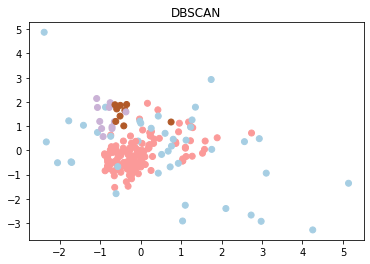

In [26]:
dbscan(df_model,1.5,5)

In [27]:
df_model['Type of Glass'] = df['Type of Glass']

In [28]:
df_model['Label'] = model.labels_

In [29]:
df_model

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass,Label
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1,0
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1,0
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1,0
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1,0
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1,0
...,...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7,1
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7,2
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7,2
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7,2


In [30]:
df_glass = df_model.groupby(['Label','Type of Glass']).count()

In [31]:
df_glass

RI  Na  Mg  Al  Si   K  Ca  Ba  Fe
Label Type of Glass                                    
-1    1               1   1   1   1   1   1   1   1   1
      2              16  16  16  16  16  16  16  16  16
      3               1   1   1   1   1   1   1   1   1
      5              12  12  12  12  12  12  12  12  12
      6               4   4   4   4   4   4   4   4   4
      7               7   7   7   7   7   7   7   7   7
 0    1              69  69  69  69  69  69  69  69  69
      2              60  60  60  60  60  60  60  60  60
      3              16  16  16  16  16  16  16  16  16
      5               1   1   1   1   1   1   1   1   1
      6               5   5   5   5   5   5   5   5   5
      7               1   1   1   1   1   1   1   1   1
 1    7              12  12  12  12  12  12  12  12  12
 2    7               9   9   9   9   9   9   9   9   9

In [32]:
arr_points

[1, 2, 3, 5, 6, 7]

In [33]:
arr_col_scan= []

In [34]:
labels_act = []

In [35]:
for pos in model.labels_:
    if(pos not in labels_act):
        labels_act.append(pos)

In [36]:
labels_act

[0, -1, 1, 2]

In [37]:
for pos in labels_act:
    arr_info = []
    for row in arr_points:
        try:
            arr_info.append(df_glass.loc[pos,row].values[0])
        except KeyError:
            arr_info.append(0)
    arr_col_scan.append(arr_info)

In [38]:
df_grid = pd.DataFrame(columns=arr_points,data=arr_col_scan)

In [39]:
df_grid

,1,2,3,5,6,7
0,69,60,16,1,5,1
1,1,16,1,12,4,7
2,0,0,0,0,0,12
3,0,0,0,0,0,9


In [40]:
df_grid['Actual Index'] = labels_act

In [41]:
df_grid

,1,2,3,5,6,7,Actual Index
0,69,60,16,1,5,1,0
1,1,16,1,12,4,7,-1
2,0,0,0,0,0,12,1
3,0,0,0,0,0,9,2


In [42]:
df_grid.set_index('Actual Index')

,1,2,3,5,6,7
Actual Index,,,,,,
0,69,60,16,1,5,1
-1,1,16,1,12,4,7
1,0,0,0,0,0,12
2,0,0,0,0,0,9


In [43]:
from sklearn.metrics import silhouette_score

In [44]:
import numpy as np

In [45]:
labels = model.labels_

In [46]:
df_new = df_model.drop(columns=['Type of Glass', 'Label'])

In [47]:
df_new

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [59]:
rows = [1,2,3,4,5]

In [64]:
df_test = df_new.iloc[rows]

In [77]:
df_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
5,-0.793931,-0.758384,0.643117,0.351521,0.412905,0.219689,-0.624699,-0.352877,2.088150


In [78]:
from sklearn.neighbors import NearestNeighbors

In [79]:
mod_n = NearestNeighbors(n_neighbors=2)

In [80]:
ne = mod_n.fit(df_test)

In [81]:
distances, indices = ne.kneighbors(df_test)

In [82]:
distances

array([[0.        , 0.82668668],
       [0.        , 0.82668668],
       [0.        , 0.63733132],
       [0.        , 0.63733132],
       [0.        , 2.8637999 ]])

In [83]:
ans=0
for pos in distances:
    ans+=pos
ans=ans/len(distances)

In [84]:
ans

array([0.        , 1.15836718])

In [73]:
indices

array([[  1, 119],
       [  2,  73],
       [  3,  26],
       [  4,   6],
       [  5,  10]])

In [49]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Distance')

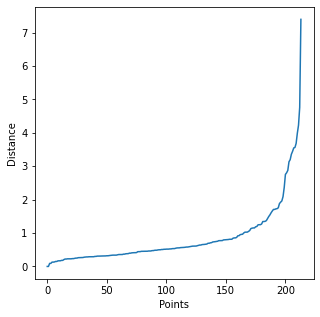

In [51]:
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(df_new)

distances, indices = neighbors.kneighbors(df_new)
distances = np.sort(distances[:,1], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

Using KNearestNeighbors to find a variable number of points that are close to another point and find the average distance between all these points to that one singular point.

We then plot the average k-distances in ascending order on a k-distance graph

1.3449232188752993


<Figure size 360x360 with 0 Axes>

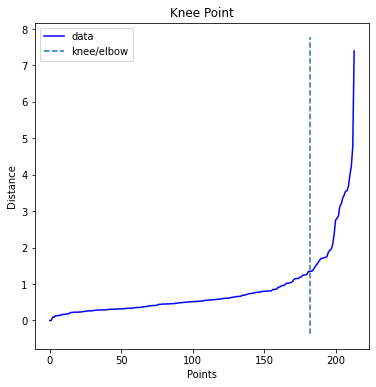

In [52]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])
eps_opt = distances[knee.knee]

Using kneed library, I was able to find the optimal eps from the graph

In [53]:
v_scores=[]

In [54]:
from sklearn.metrics import v_measure_score

Imported a metric and used optimal eps distance and iterated through an array of chosen min_samples to find the one with the highest v_measure_score

In [55]:
min_samp = [2,3,4,5,6,7]

In [56]:
for pos in min_samp:
    mod = DBSCAN(eps=eps_opt,min_samples=pos)
    mod.fit(df_new)
    label_s = mod.labels_
    v_scores.append(v_measure_score(y, label_s))

In [57]:
v_scores

[0.37740034882466217,
 0.34945436370350447,
 0.34485648484586157,
 0.34485648484586157,
 0.35787111926422654,
 0.35787111926422654]

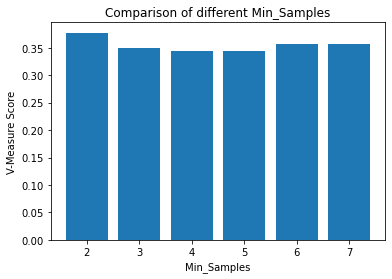

In [58]:
plt.bar(min_samp, v_scores)
plt.xlabel('Min_Samples')
plt.ylabel('V-Measure Score')
plt.title('Comparison of different Min_Samples')
plt.show()

As you can see above, the min_samples value corresponding to 2 had the highest v_measure_score alongside the optimum eps distance and this tells us for something to be called a core point, it must have more than or equal to 2 points in its circle with radius equated to the optimal eps distance